In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [11]:
def parser_excel(excel_path, class_num, label1_id, label2_id):
    train_excel = pd.read_excel(excel_path, header=None, skiprows=[0])
    label1 = []
    for row in train_excel[1]:
        label1.append(label1_id[row])
    label2 = []
    for row in train_excel[2]:
        label2.append(label2_id[row])
    data = []
    for index in range(len(train_excel[4])):
        data.append((train_excel[4][index], np.eye(class_num[0])[label1[index]],
                     np.eye(class_num[1])[label2[index]]))
    return data
def get_id_label(label_id):
    id_label = {}
    for k in label_id:
        id_label[label_id[k]] = k
    return id_label

In [12]:
label1_id = {}
label2_id = {}
id_label1 = {}
id_label2 = {}
with open("data/label1_id.pkl", 'rb') as f:
    label1_id = pickle.load(f)
    id_label1 = get_id_label(label1_id)
with open("data/label2_id.pkl", 'rb') as f:
    label2_id = pickle.load(f)
    id_label2 = get_id_label(label2_id)
class_num = [len(label1_id), len(label2_id)]
train_data = parser_excel("data/data_clean_label1_train.xlsx", class_num, label1_id, label2_id)
valid_data = parser_excel("data/data_clean_label1_valid.xlsx", class_num, label1_id, label2_id)
label1_list = [id_label1[np.argmax(d[1])] for d in train_data]
label2_list = [id_label2[np.argmax(d[2])] for d in train_data]

In [13]:
label1_id, id_label1

({'Abandon': 2, 'Accelerate': 1, 'Advance': 0},
 {0: 'Advance', 1: 'Accelerate', 2: 'Abandon'})

In [15]:
train_list = [np.argmax(d[1]) for d in train_data]
train_hist = np.histogram(train_list, len(label1_id))
train_hist

(array([31, 18, 21], dtype=int64),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))

In [13]:
len(train_data) / train_hist[0]

array([2.25806452, 3.88888889, 3.33333333])

### label1

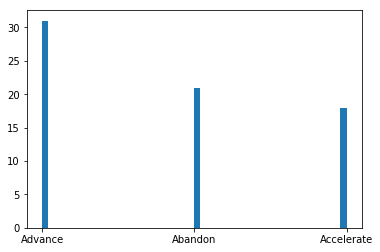

In [17]:
plt.hist([id_label1[np.argmax(d[1])] for d in train_data], 50)
plt.show()

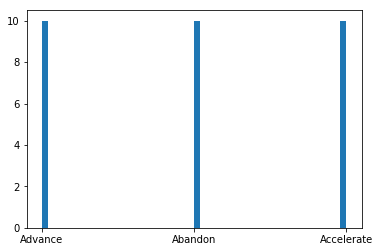

In [18]:
plt.hist([id_label1[np.argmax(d[1])] for d in valid_data], 50)
plt.show()

### label2

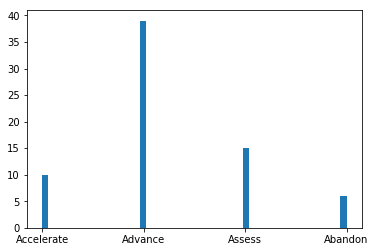

In [22]:
plt.hist([id_label2[np.argmax(d[2])] for d in train_data], 50)
plt.show()

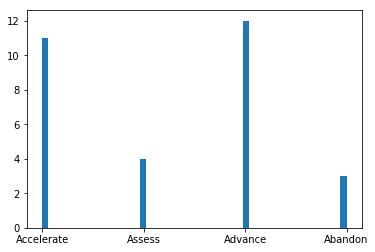

In [20]:
plt.hist([id_label2[np.argmax(d[2])] for d in valid_data], 50)
plt.show()